# Install Required Libraries and Dependencies and Read In Initial Dataset

In [2]:
# Import necessary libraries and components

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy as pt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import chi2_contingency

In [3]:
# Read in initial dataset
# Create a datafram for initial dataset
# Inspect first several rows

tech_df = pd.read_csv("https://img1.wsimg.com/blobby/go/95a603d1-9621-42dd-ac5a-bc61ff2699b4/downloads/46e78d8b-3941-4da9-a204-93f612493201/data.csv?ver=1758495217438")
tech_df.head()

,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


In [4]:
tech_df.describe()

,mh_share,age
count,1242.000000,1242.000000
mean,6.572464,35.030598
std,2.701952,8.186624
min,0.000000,19.000000
25%,5.000000,29.000000
50%,7.000000,34.000000
75%,9.000000,40.000000
max,10.000000,66.000000


### Description of Initial Dataset
1,242 rows each with 11 variables:
- tech_company
- benefits
- workplace_resources
- mh_employer_discussion
- mh_coworker_discussion
- medical_coverage
- mental_health
- mh_share
- age
- gender
- country

In [5]:
# Loop through columns to describe each variable and its value counts

columns_to_count = ['tech_company', 'benefits', 'workplace_resources',	'mh_employer_discussion',	'mh_coworker_discussion',	'medical_coverage',	'mental_health',	'mh_share',	'age',	'gender',	'country']

for column in columns_to_count:
    print(f"Value counts for column '{column}':")
    print(tech_df[column].value_counts())
    print("\n")


Value counts for column 'tech_company':
tech_company
Yes    899
No     343
Name: count, dtype: int64


Value counts for column 'benefits':
benefits
Yes             781
I don't know    308
No              153
Name: count, dtype: int64


Value counts for column 'workplace_resources':
workplace_resources
No              465
Yes             431
I don't know    346
Name: count, dtype: int64


Value counts for column 'mh_employer_discussion':
mh_employer_discussion
No     832
Yes    410
Name: count, dtype: int64


Value counts for column 'mh_coworker_discussion':
mh_coworker_discussion
No     679
Yes    563
Name: count, dtype: int64


Value counts for column 'medical_coverage':
medical_coverage
Yes    1147
No       95
Name: count, dtype: int64


Value counts for column 'mental_health':
mental_health
Yes           553
No            345
Possibly      257
Don't Know     87
Name: count, dtype: int64


Value counts for column 'mh_share':
mh_share
10    201
8     199
7     187
5     156
9     135


# Exploratory Data Analysis:

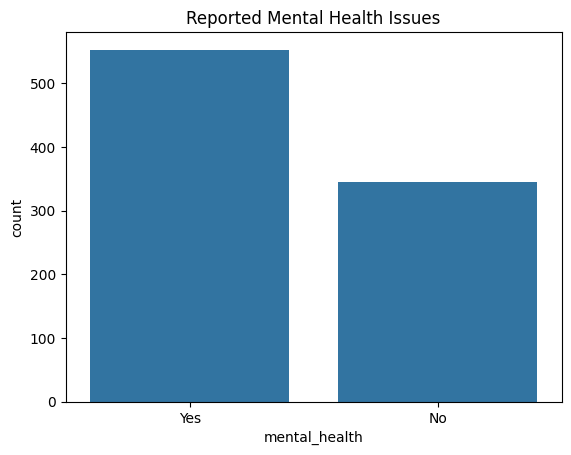

In [6]:
# Step 2: Exploratory Data Analysis (EDA)
# --------------------------------------------------

# Bar chart of mental health reports - all respondents
sns.countplot(data=tech_df, x="mental_health", order=["Yes", "No"])
plt.title("Reported Mental Health Issues - All Respondents")
plt.show()

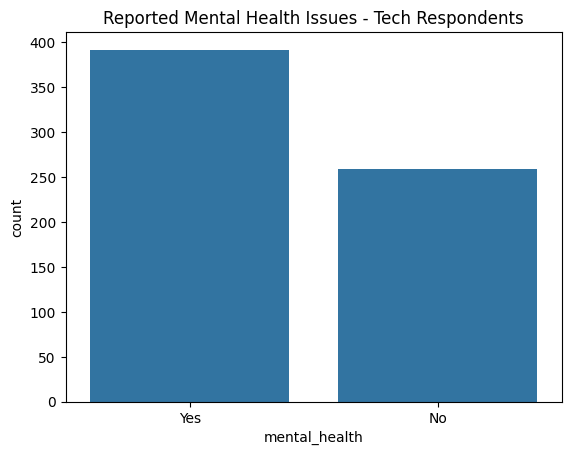

In [9]:
# Bar chart of mental health reports - only respondents working for tech company

sns.countplot(data=tech_df[tech_df['tech_company'] == "Yes"], x="mental_health", order=["Yes", "No"])
plt.title("Reported Mental Health Issues - Tech Respondents")
plt.show()


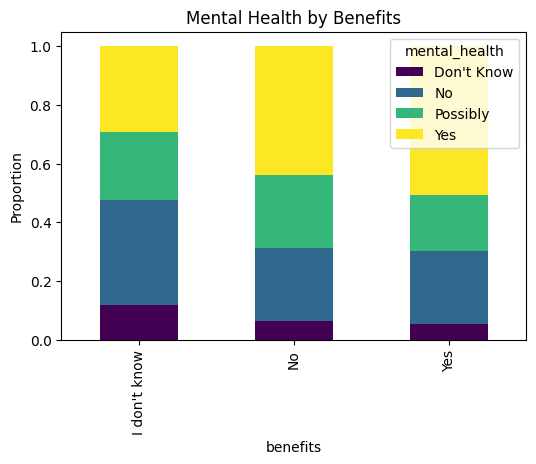

In [10]:
# Stacked bar: Benefits vs Mental Health
ct = pd.crosstab(tech_df["benefits"], tech_df["mental_health"], normalize="index")
ct.plot(kind="bar", stacked=True, figsize=(6,4), colormap="viridis")
plt.title("Mental Health by Benefits")
plt.ylabel("Proportion")
plt.show()

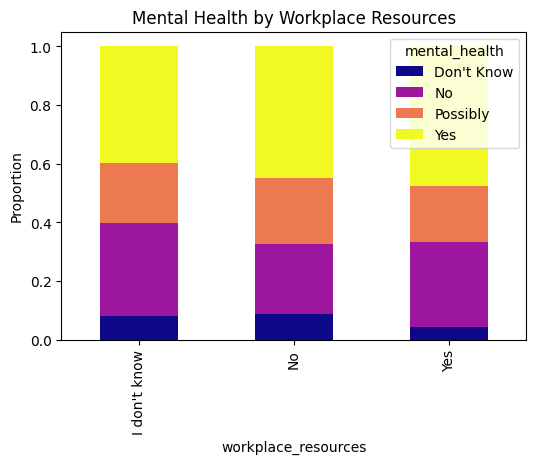

In [11]:
# Stacked bar: Resources vs Mental Health
ct2 = pd.crosstab(tech_df["workplace_resources"], tech_df["mental_health"], normalize="index")
ct2.plot(kind="bar", stacked=True, figsize=(6,4), colormap="plasma")
plt.title("Mental Health by Workplace Resources")
plt.ylabel("Proportion")
plt.show()

/tmp/ipython-input-2805665417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tech_df, x="mental_health", y="age", order=["Yes", "No"], palette="Set2")


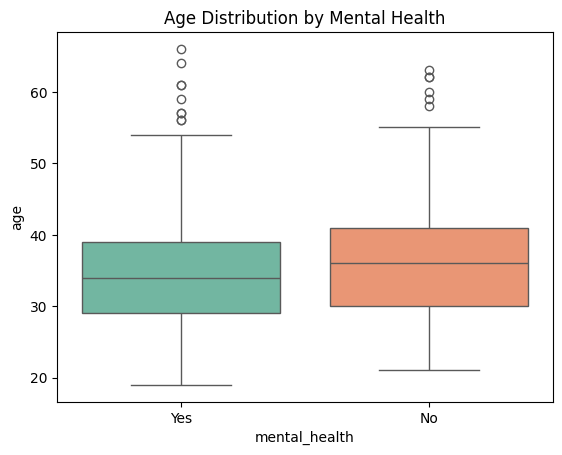

In [13]:
# Boxplot: Age by mental health
sns.boxplot(data=tech_df, x="mental_health", y="age", order=["Yes", "No"], palette="Set2")
plt.title("Age Distribution by Mental Health")
plt.show()